In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

In [2]:
df = pd.read_csv('../data/All_data_cbs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [3]:
df.shape

(92458, 28)

In [4]:
df.columns

Index([u'rowHash', u'Id', u'Title', u'Description', u'LikeCount',
       u'DislikeCount', u'ViewCount', u'FavoriteCount', u'CommentCount',
       u'PublishedAt', u'Channel Id', u'Channel Title', u'Lang',
       u'publishedAt', u'subscriberCount', u'channelVideoCount',
       u'channelViewCount', u'nextHash', u'PrevCommentCount',
       u'PrevDislikeCount', u'PrevLikeCount', u'PrevPublishedAt',
       u'PrevViewCount', u'PrevTitle', u'PublishedYear', u'ChannelAge',
       u'Title-clickbait', u'PrevTitle-clickbait'],
      dtype='object')

In [5]:
# Drop tinie tempah
df = df[(df['Channel Id'] != 'UCDSX4RQN7fzIlZ1nSubwCcQ')]

In [6]:
df = df[df['ViewCount'] < 100000]

In [7]:
def top_k_percentile_views_mask(df, k):
    top_k_percent = df['ViewCount'].nlargest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] > top_k_percent

In [76]:
def bottom_k_percentile_views_mask(df, k):
    bottom_k_percent = df['ViewCount'].nsmallest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] < bottom_k_percent

In [8]:
df['Percentile-Bin'] = pd.cut(df['ViewCount'], bins=25)

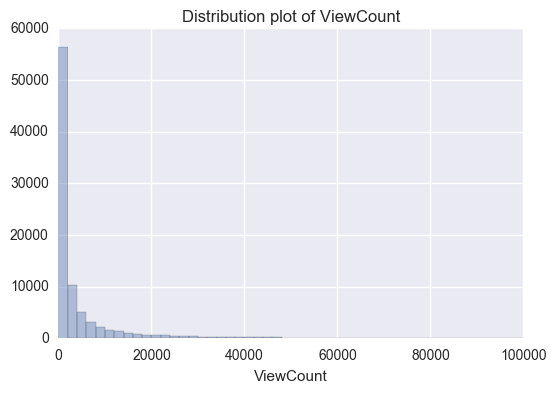

In [9]:
ax = plt.axes()
sns.distplot(df['ViewCount'], kde=False)
ax.set_title('Distribution plot of ViewCount')

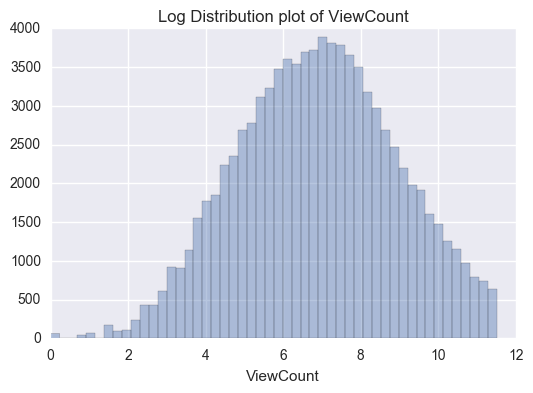

In [10]:
ax = plt.axes()
sns.distplot(np.log1p(df['ViewCount']), kde=False)
ax.set_title('Log Distribution plot of ViewCount')

In [13]:
df['PublishedAt'] = pd.to_datetime(df['PublishedAt'], errors='coerce')
df['PrevPublishedAt'] = pd.to_datetime(df['PrevPublishedAt'], errors='coerce')
df.dropna()

,rowHash,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,...,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,Title-clickbait,PrevTitle-clickbait,Percentile-Bin
0,0,Scp3JH3eVLw,Depeche Mode It's No Good,DANCA MUITO.,0,0,18,0,0,2017-06-25 19:12:16,...,2.0,14.0,2012-03-28 18:01:31,3911.0,the best of Jay cutler Dorian Yates,2017,2008,0.660503,0.782542,"(-99.993, 3999.72]"
1,1,wLqmkz6u8G4,the best of Jay cutler Dorian Yates,Jay cutler e Dorian Yates,14,2,3911,0,0,2012-03-28 18:01:31,...,2.0,8.0,2010-08-23 16:12:50,3853.0,Iron Man Andy photos NO PAIN NO GAIN,2012,2008,0.782542,0.974470,"(-99.993, 3999.72]"
2,2,nKMsh79uOcM,Iron Man Andy photos NO PAIN NO GAIN,Iron Man Andy muscle NO PAIN NO GAIN,8,2,3853,0,5,2010-08-23 16:12:50,...,2.0,3.0,2010-05-17 10:15:48,1392.0,the mission SEVERINA,2010,2008,0.974470,0.116492,"(-99.993, 3999.72]"
3,4,E--7XtuuqAg,Mooring Anchor Carry 120kg at Papar Strongestm...,Only manage 11 meters,0,0,56,0,0,2016-10-10 15:07:16,...,0.0,0.0,2016-10-10 15:01:02,74.0,Tire Flip 450kg at Papar Strongestman 2016,2016,2011,0.323020,0.260023,"(-99.993, 3999.72]"
4,5,fdsppIOelPw,Tire Flip 450kg at Papar Strongestman 2016,450kg x 5 flips,0,0,74,0,0,2016-10-10 15:01:02,...,0.0,0.0,2016-10-10 14:59:15,46.0,Farmer Walk 125kg each hand at Papar Strongest...,2016,2011,0.260023,0.141004,"(-99.993, 3999.72]"
5,6,tJ3bb0V5y2Y,Farmer Walk 125kg each hand at Papar Strongest...,125kg x 2 for 40 meters,0,0,46,0,0,2016-10-10 14:59:15,...,0.0,0.0,2016-10-10 14:53:25,52.0,Truck Pull 14 tonnes at Papar Strongestman 2016,2016,2011,0.141004,0.572714,"(-99.993, 3999.72]"
6,7,UYnmMwiNGUU,Truck Pull 14 tonnes at Papar Strongestman 2016,Almost 20 meters,0,0,52,0,0,2016-10-10 14:53:25,...,0.0,0.0,2016-10-10 14:51:32,31.0,Atlas Stone at Papar Strongestman 2016,2016,2011,0.572714,0.197839,"(-99.993, 3999.72]"
7,8,3anYa8MAjvA,Atlas Stone at Papar Strongestman 2016,I manage carry up to 130kg stone,0,0,31,0,0,2016-10-10 14:51:32,...,0.0,1.0,2016-08-26 22:47:27,112.0,Deadlift 240kg Arnold Classic Asia Hong Kong,2016,2011,0.197839,0.451104,"(-99.993, 3999.72]"
8,10,lT5lqT0zJgk,200kg Bench Press with support,Just wanna get the feel. My PR only 160 at the...,2,0,109,0,0,2016-03-02 08:17:23,...,0.0,0.0,2016-02-18 05:55:58,164.0,Farmer Walk 130kg Arnold Classic Australia,2016,2011,0.565735,0.113987,"(-99.993, 3999.72]"
9,11,9qIULP6nY04,Farmer Walk 130kg Arnold Classic Australia,"Arnold Classic Australia Qualifier 2016, Victo...",0,0,164,0,0,2016-02-18 05:55:58,...,0.0,2.0,2015-11-24 08:19:52,99.0,Car Deadlift at Final Singapore Strongman 2015...,2016,2011,0.113987,0.037554,"(-99.993, 3999.72]"


In [15]:
df['TimeDiff'] = pd.to_timedelta(df['PublishedAt']).subtract(pd.to_timedelta(df['PrevPublishedAt']))

In [19]:
# Drop some that have negative time diff values
df = df[df['TimeDiff'] > pd.Timedelta(0)]

In [21]:
df['Daysdiff'] = df['TimeDiff'].divide(np.timedelta64(24, 'h'))

In [22]:
df['ViewCount'].describe()

count    87514.000000
mean      5732.617798
std      13092.681334
min          0.000000
25%        234.000000
50%       1009.000000
75%       4167.750000
max      99993.000000
Name: ViewCount, dtype: float64

In [ ]:
daysdiff_viewcount_mean = df.groupby('Daysdiff')['ViewCount'].mean()
plt.scatter(daysdiff_viewcount_mean.index, daysdiff_viewcount_mean)

In [39]:
df = df[df['PrevViewCount'] > 0]
df = df[df['ViewCount'] > 0]
df['ViewCountDifference'] = df['ViewCount'] - df['PrevViewCount']
df['PercentDifference'] = df['ViewCountDifference'] / df['PrevViewCount']

In [40]:
df = df[np.abs(df['PercentDifference']) < 5]

In [41]:
df['PercentDifference'].describe()

count    80134.000000
mean         0.215508
std          1.175170
min         -0.999918
25%         -0.596490
50%         -0.143141
75%          0.584762
max          4.998192
Name: PercentDifference, dtype: float64

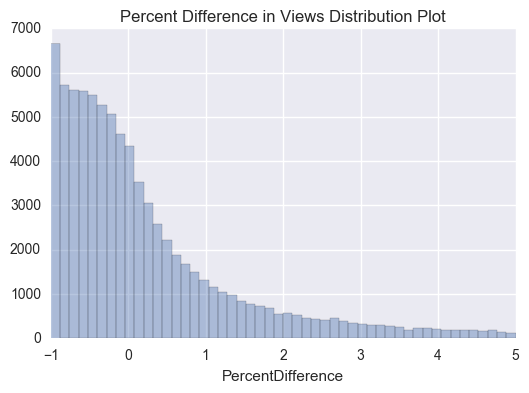

In [42]:
ax = plt.axes()
sns.distplot(df['PercentDifference'], kde=False)
ax.set_title('Percent Difference in Views Distribution Plot')

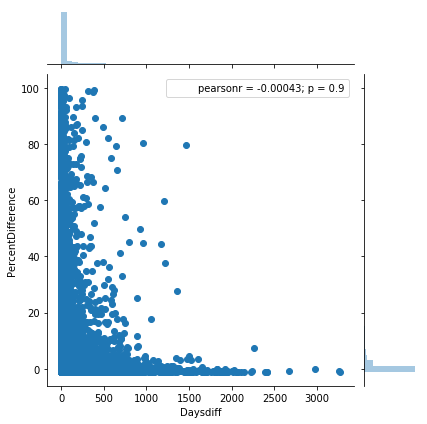

In [190]:
df_t = df[df['PercentDifference'] < 100]
sns.jointplot(df_t['Daysdiff'], df_t['PercentDifference'])

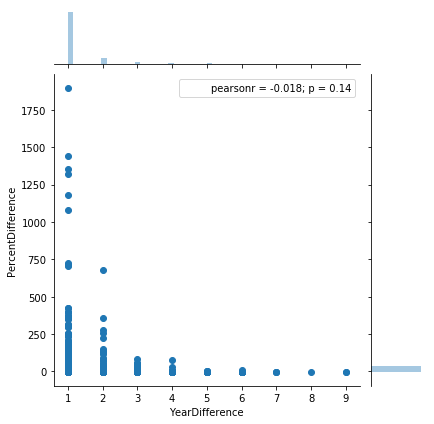

In [101]:
df_t = df[df['YearDifference'] > 0]
sns.jointplot(df_t['YearDifference'], df_t['PercentDifference'])

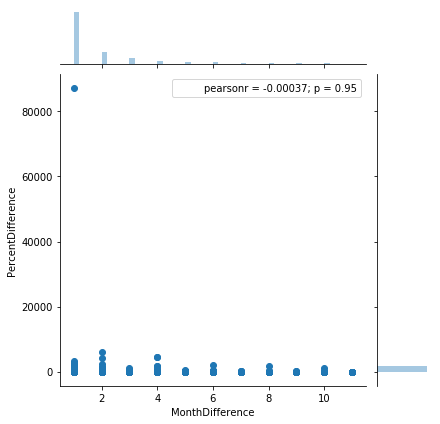

In [102]:
df_t = df[(df['YearDifference'] < 1) & (df['MonthDifference'] > 0)]
sns.jointplot(df_t['MonthDifference'], df_t['PercentDifference'])

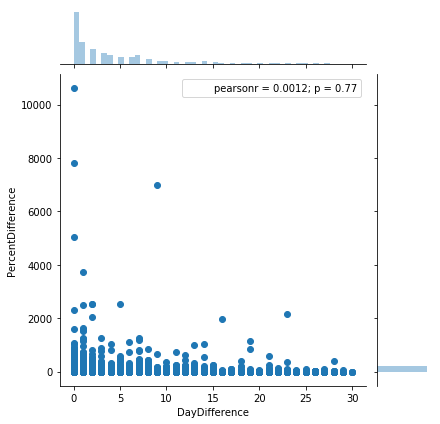

In [103]:
df_t = df[(df['YearDifference'] < 1) & (df['MonthDifference'] < 1)]
sns.jointplot(df_t['DayDifference'], df_t['PercentDifference'])

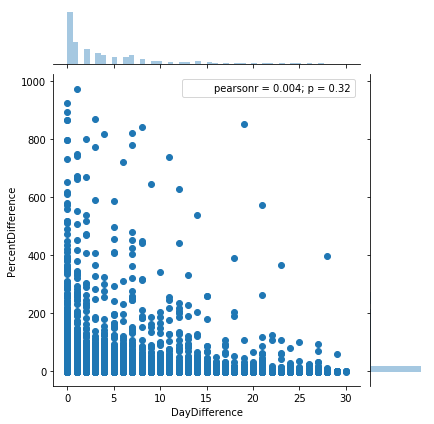

In [104]:
df_t = df[(df['YearDifference'] < 1) & (df['MonthDifference'] < 1) & (df['PercentDifference'] < 1000)]
sns.jointplot(df_t['DayDifference'], df_t['PercentDifference'])

# Looking at difference in clickbait scores

In [49]:
df['clickbait-difference'] = df['Title-clickbait'] - df['PrevTitle-clickbait']

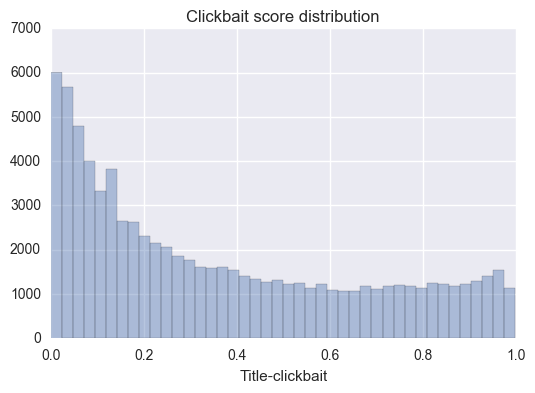

In [50]:
ax = plt.axes()
sns.distplot(df['Title-clickbait'], kde=False)
ax.set_title('Clickbait score distribution')

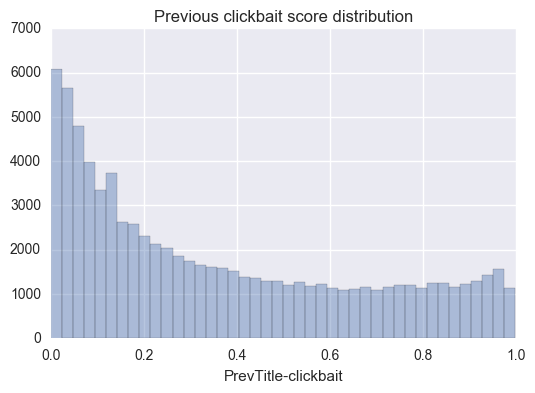

In [51]:
ax = plt.axes()
sns.distplot(df['PrevTitle-clickbait'], kde=False)
ax.set_title('Previous clickbait score distribution')

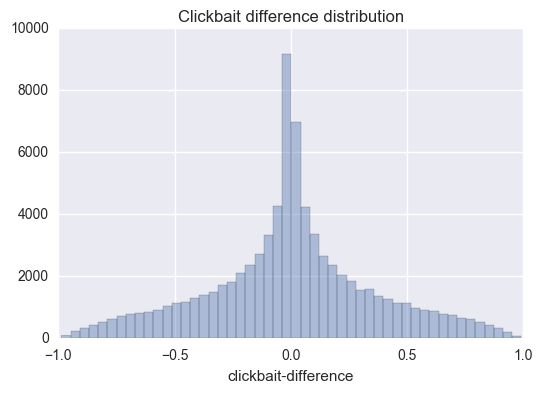

In [56]:
ax = plt.axes()
sns.distplot(df['clickbait-difference'], kde=False)
ax.set_title('Clickbait difference distribution')

In [77]:
k = 10
topk = top_k_percentile_views_mask(df, k)
botk = bottom_k_percentile_views_mask(df, k)

In [78]:
botk.sum()

7973

In [81]:
df[topk]['Title-clickbait'].mean()

0.3845756202029799

In [82]:
df[botk]['Title-clickbait'].mean()

0.350279981972073

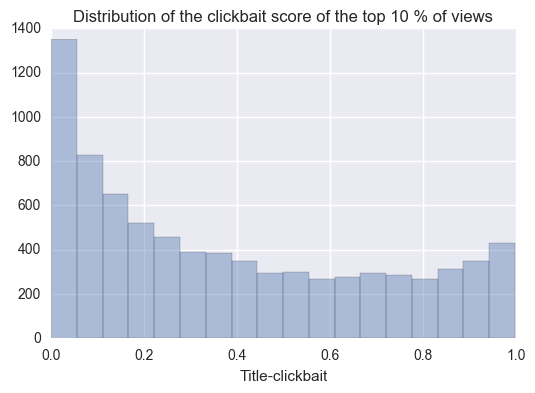

In [79]:
ax = plt.axes()
sns.distplot(df[topk]['Title-clickbait'], kde=False)
ax.set_title('Distribution of the clickbait score of the top {0} % of views'.format(k))

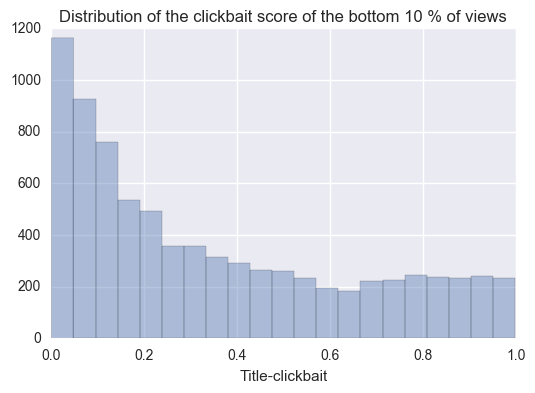

In [80]:
ax = plt.axes()
sns.distplot(df[botk]['Title-clickbait'], kde=False)
ax.set_title('Distribution of the clickbait score of the bottom {0} % of views'.format(k))